<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 4, 2020 -->
# Project 1 on Machine Learning, deadline October 4, 2020
<!-- dom:AUTHOR: [Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html) at University of Oslo, Norway -->
<!-- Author: -->  
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **Sep 10, 2021**

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including the Ordinary Least Squares (OLS) method,
The total score is **100** points. Each subtask has its own final score.


We will first study how to fit polynomials to a specific
two-dimensional function called [Franke's
function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf).  This
is a function which has been widely used when testing various
interpolation and fitting algorithms. Furthermore, after having
established the model and the method, we will employ resamling
techniques such as cross-validation and/or bootstrap in order to perform a
proper assessment of our models. We will also study in detail the
so-called Bias-Variance trade off.


The Franke function, which is a weighted sum of four exponentials  reads as follows

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function will be defined for $x,y\in [0,1]$.  Our first step will
be to perform an OLS regression analysis of this function, trying out
a polynomial fit with an $x$ and $y$ dependence of the form $[x, y,
x^2, y^2, xy, \dots]$. We will also include bootstrap first as
a resampling technique.  After that we will include the cross-validation technique. As in homeworks 1 and 2, we can use a uniform
distribution to set up the arrays of values for $x$ and $y$, or as in
the example below just a set of fixed 
values for $x$ and $y$ with a given step
size.  We will fit a
function (for example a polynomial) of $x$ and $y$.  Thereafter we
will repeat much of the same procedure using the Ridge and Lasso
regression methods, introducing thus a dependence on the bias
(penalty) $\lambda$.

Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.


The Python code for the Franke function is included here (it performs also a three-dimensional plot of it)

In [1]:
from IPython.display import display
from IPython.display import Markdown as md
%matplotlib inline

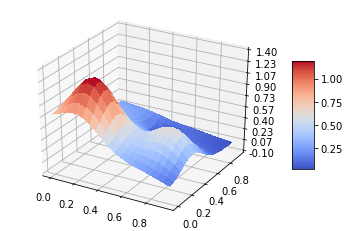

In [59]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

def FrankeFunction(x,y, noise_std=1, add_noise=False):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    seed(1436) # Use same random number generator
    noise = np.random.normal(0, noise_std, len(x)) if add_noise else 0
    return term1 + term2 + term3 + term4 + noise

noise_std = 1
z = FrankeFunction(x, y, noise_std)

def plot_Franke(x, y, z):
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    # Plot the surface.
    surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
    
plot_Franke(x, y, z)

### Exercise 1: Ordinary Least Square (OLS) on the Franke function (score 10 points)

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $\cal{N}(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) or use your code from
homeworks 1 and 2 and perform a standard least square regression
analysis using polynomials in $x$ and $y$ up to fifth order. Find the
[confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval) of the parameters (estimators) $\beta$ by computing their
variances, evaluate the Mean Squared error (MSE)

$$
MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.  If $\tilde{\hat{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\hat{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Your code has to include a scaling of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For this exercise you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it).  This function is called
$train\_test\_split$.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually  also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.


You can easily reuse the solutions to your exercises from week 35 and week 36.

### Solution:

This exercise concerns the ability of a polynomial function of two dimensional input data $(x, y)$ to fit a two dimensional target function, generated from the same two input variables. Polynomials are smooth, well-behaved functions, and expanding input data with polynomial features is a feasible process. Thus, if the addition of polynomial features proves to increase the accuracy of the fit, it is certainly a method worthy to implement.

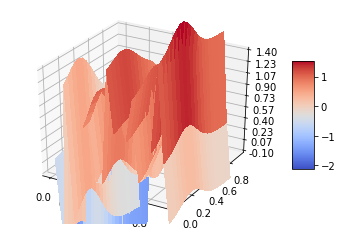

In [61]:
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y, noise_std, add_noise=True)

plot_Franke(x, y, z)

The addition of a standard normal distributed noise to the FrankeFunction causes significant deviations from the original output, as shown in figure above. Consequently, the new output values ranges greatly beyond 0 and 1, with multiple outliers. The large variation can raise some problems when fitting a polynomial. To disclose this, one can scale the data and check for performance improvements. The following code blocks generate the OLS algorith and error statistics, add polynomial features, test the implementations and eventually runs them.

In [3]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression
import pandas as pd

In [62]:
def OLS_scikit(X, Xpred, y):
    linreg = LinearRegression(fit_intercept=False)
    linreg.fit(X, y)
    beta = linreg.coef_
    inv_cov = np.linalg.pinv(X.T @ X)
    y_pred = linreg.predict(Xpred)
    return y_pred, inv_cov, beta

In [63]:
def OLS_self(X, Xpred, y):
    inv_cov = np.linalg.pinv(X.T @ X)
    beta = inv_cov @ X.T @ y # Use pinv to resolve problem inverting singular matrices
    ypred = Xpred @ beta
    return ypred, inv_cov, beta

In [64]:
def R2(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

def MSE(y_true, y_pred):
    n = np.size(y_pred)
    return np.sum((y_true-y_pred)**2)/n

In [65]:
def test_error_implementation():
    """Test to see if error scores are implemented correctly,
    compared with scikit's error functions.
    """
    y_true = np.array([3.56, 7.5, 6.13])
    y_pred = np.array([4.22, 7.9, 6.01])
    mse_self = MSE(y_true, y_pred)
    mse_scikit = mean_squared_error(y_true, y_pred)
    r2_self = R2(y_true, y_pred)
    r2_scikit = r2_score(y_true, y_pred)
    
    assert np.allclose(mse_self, mse_scikit)
    assert np.allclose(r2_self, r2_scikit)
    
test_error_implementation()

In [226]:
def create_X(x, y, n):
    """Create design matrix consisting of polynomial features of x and y, up to degree n.
    Args:
        x (array): 2D-array of x-coordinates
        y (array): 2D-array of y-coordinates
        n (int): number of polynomial degrees
    Returns:
        (array): 2D-array of polynomial features of x and y
        
    """
    if len(x.shape) > 1: # Reduce vectors to 1D
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta (x, y, xy, x*x, ...)
    X = np.ones((N,l)) # (inputs, features)

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k) # Insert all 2D polynomial features (in total l columns assigned)
    
    #X = np.delete(X, 0, 1)
    return X

In [227]:
def test_design_matrix():
    n = 3
    x = np.arange(0, 1, 0.1)
    y = np.arange(0, 0.5, 0.05)
    X_own = create_X(x, y, n)
    
    poly = PolynomialFeatures(degree=n)
    X_scikit = poly.fit_transform(np.vstack([x,y]).T)
    
    #assert X_own.shape == X_scikit.shape # Check that the methods include same polynomial features
    
    #for col in range(len(X_own)):
        #assert np.allclose(X_own[col], X_scikit[col]) # Check that polynomial features match for each vector
    
test_design_matrix()

In [258]:
def scaling_train_test(scale, train, test):
    scl = scale()
    scl.fit(train)
    train_scaled = scl.transform(train)
    test_scaled = scl.transform(test) # Scale test set using same statistical parameters as for train set
    return train_scaled, test_scaled

In [311]:
def run_OLS(x_y, z, nr_deg, scale=None):
    """Run OLS on input data x and y and targets z.
    Args:
        x, y (array): 1D arrays of coordinates
        z (array): 1D array of target values
    Returns:
        
    """
    X = create_X(x_y[:,0], x_y[:,1], nr_deg)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=2020)
    
    if scale is not None:
        X_train, X_test = scaling_train_test(scale, X_train, X_test)
        
    z_tilde, inv_cov, beta = OLS_scikit(X_train, X_train, z_train)
    z_pred, _, _ = OLS_scikit(X_train, X_test, z_train) # Training on same data set, so beta is same as above
    
    return z_train, z_test, z_tilde, z_pred, beta, inv_cov

In [312]:
def OLS_get_stats(z_train, z_test, z_tilde, z_pred, betas, inv_cov):
    """Calculate error measures (MSE and R2) for given predictions and targets,
    and the confidence interval of the mean optimal parameter beta.
    
    """
    mse_train = MSE(z_train, z_tilde)
    mse_test = MSE(z_test, z_pred)
    r2_train = R2(z_train, z_tilde)
    r2_test = R2(z_test, z_pred)
    
    bias_train = np.mean((z_train.reshape(z_train.shape[0], 1) - np.mean(z_tilde, axis=0, keepdims=True))**2) # E(z_tilde) -> take expected value of each column vector
    variance_train = np.mean((z_tilde - np.mean(z_tilde, axis=0, keepdims=True))**2)
    
    errors = np.array([round(mse_train, 5), round(mse_test, 5), round(r2_train, 5), round(r2_test, 5)])
    
    cov_betas = noise_std**2*inv_cov # Analytical expression for the covariance of beta
    var_betas = np.diag(cov_betas) # Variances are the diagonal entries of covariance matrix
    sigma = np.sqrt(var_betas)
    
    # Use the common two-sigma to define our CI
    CI_lower = betas - 2*sigma 
    CI_upper = betas + 2*sigma 
    
    CI = np.array([[low, up] for low, up in zip(CI_lower, CI_upper)])
    
    return errors, CI, bias_train, variance_train

In [384]:
x = np.arange(0, 1, 0.001)
y = np.arange(0, 1, 0.001)
x, y = np.meshgrid(x, y)

x_1d = np.ravel(x).reshape(np.size(x), 1) # Turn gridded x into 1d vector
y_1d = np.ravel(y).reshape(np.size(y), 1)
x_y = np.hstack((x_1d, y_1d))

z = FrankeFunction(x, y, add_noise=True)
z_1d = np.ravel(z) # Convert to 1d vector to make it compatible with new matrix x_y

Es = {'Unscaled':np.zeros(len(x)), 'StandardScaler':np.zeros(len(x)), 'MinMaxScaler':np.zeros(len(x))} # Errors
betas = {'Unscaled':np.zeros(len(x)), 'StandardScaler':np.zeros(len(x)), 'MinMaxScaler':np.zeros(len(x))}
deg = 5

for scaler in StandardScaler, MinMaxScaler:
    
    z_train, z_test, z_tilde, z_pred, beta, inv_cov = run_OLS(x_y, z_1d, nr_deg=deg)
    z_train_scale, z_test_scale, z_tilde_scale, z_pred_scale, beta_scale, inv_cov_scale \
                            = run_OLS(x_y, z_1d, nr_deg=deg, scale=scaler)

    E_unscale, _, _, _ = OLS_get_stats(z_train, z_test, z_tilde, z_pred, beta, inv_cov)
    E_scale, CI_scale, bias, variance = OLS_get_stats(z_train_scale, z_test_scale, z_tilde_scale, z_pred_scale, \
                                        beta_scale, inv_cov_scale)
    if scaler==StandardScaler: 
        Es['Unscaled'] = E_unscale # Only append unscaled error once
        betas['Unscaled'] = beta
        CI = CI_scale # Only calculate confidence interval when using StandardScaler
        b = bias
        v = variance
        

    Es[scaler.__name__] = E_scale
    betas[scaler.__name__] = beta_scale

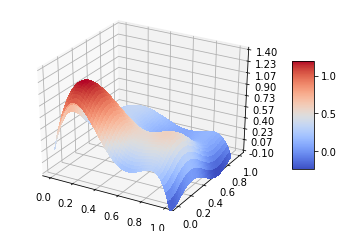

In [385]:
x_y_new = create_X(x_y[:,0], x_y[:,1], deg)
pred = x_y_new @ beta
pred = pred.reshape(len(x), len(y))
plot_Franke(x, y, pred)

Degree 2 | Degree 5 | Degree 10
- | - | -
![alt](figs/plotFranke_deg2.png) | ![alt](figs/plotFranke_deg5.png) |![alt](figs/plotFranke_deg10.png)

The three plots above show reproduced FrankeFunctions from the trained model for polynomial degrees 2, 5 and 10, respectively. It is clear that a fitted polynomial of degree two is too simplistic and unable to capture the characteristics of the FrankeFunction. On the other hand, a fifth order polynomial seems to be a good fit, because it interpolates rather well with the true FrankeFunction. Lastly, the fitted tenth order polynomial is a worse fit, as it contains too severe fluctuations and spikes that causes overfitting. Conclusively, this visual interpretation gives an indication of what model to select.

In [386]:
E = pd.DataFrame(np.vstack([Es['Unscaled'], Es['StandardScaler'], Es['MinMaxScaler']]))
E.rename(columns={0:'MSE train', 1:'MSE test', 2:'R2 train', 3:'R2 test'}, inplace=True)
E.index = ['Unscaled', 'StandardScaler', 'MinMaxScaler']
display(E)

,MSE train,MSE test,R2 train,R2 test
Unscaled,1.01547,1.01566,0.08234,0.08494
StandardScaler,1.18976,1.18975,-0.07516,-0.07190
MinMaxScaler,1.01568,1.01579,0.08215,0.08482


|   | MSE train	| MSE test | R2 train | R2 test  |
|---|-----------|----------|----------|----------|
| **Unscaled** | 0.93708	| 0.95451  | 0.18836  | 0.18105 |
| **StandardScaler**	| 1.06418	| 1.08566  | 0.07827  | 0.06853 |
| **MinMaxScaler**	| 0.93738	| 0.95510  | 0.18810  | 0.18054 | 

The table above shows the calculated MSE and R2 for the unscaled data and scaled data (StandardScaler and MinMaxScaler). The errors for both training and test data are substantial. This is caused by the random noise added to FrankeFunction, making it less smooth. Thus, higher order polynomials are required to make an accurate fit. 

It is worth mentioning that the error estimates vary significantly for different runs. The general trend, though, is that the scaled data doesn't provide any better error results - they are quite close to the unscaled error and actually slightly worse in most cases. The explanation is that the input features $x$ and $y$ can already be considered "scaled", as they are defined uniformly in the interval $[0, \: 1]$. Hence, scaling has essentially little to no effect on this dataset.

It is, however, always a good habit to scale the data before running an algorithm. It will rarely lead to significantly worse results, but will in many cases provide much better results, especially when the input features differ considerably in magnitude. Despite the scaling not providing better performance for this particular dataset, I still choose to scale the data using StandardScaler, as it transforms potentially weird-looking data to a well-behaved standard normal distribution.

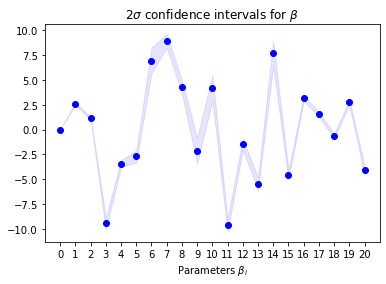

In [387]:
poly_features = np.arange(len(CI))
plt.scatter(poly_features, betas['StandardScaler'], c='b')
plt.fill_between(poly_features, CI[:,0], CI[:,1], color='b', alpha=0.1)
plt.xlabel(r'Parameters $\beta_i$')
plt.title(r'2$\sigma$ confidence intervals for $\beta$')
plt.xticks(range(0, len(poly_features)));

100x100 data points | 1000x1000 data points
- | -
![alt](figs/ex1_100n.png) | ![alt](figs/ex1_1000n.png)

The two plots above show the confidence intervala for the $\beta$ parameters for polynomial inputs of degree five. The parameters are ordered from their corresponding lowest polynomial order to highest polynomial order (e.g. $[1,\:x,\:y,\: \dots , \:x^4 y, \:x^5, \:y^5]$ for fifth order). The left and right plots are for 100 and 1000 data samples, respectively. Notice the larger span of the confidence intervals in the left plot compared to the right plot (note the different scale of y-axis). To explain this, we'll have a look at the formula for the variance of $\beta$:

\begin{equation}
    \text{Var}(\beta) = \sigma_\epsilon^2 (X^T X)^{-1},
\end{equation}

where $\sigma_\epsilon^2$ is the variance of the target values $z$ (given by the random noise in FrankeFunction). The corresponding confidence interval is defined as:

\begin{equation}
     \text{CI} = \big[ \hat{\beta} - 2\sigma, \: \hat{\beta} + 2\sigma \big],
\end{equation}

where $\hat{\beta}$ is the unbiased estimator of the mean value of $\beta$, that is $E[\hat{\beta}] = \hat{\beta}$, and $\sigma$ is the standard deviation of the parameters $\beta$; $\sqrt{\text{Var}(\beta)}$.

We see that a larger variation of noise produces larger variance of the parameters $\beta$, because a more dominant noise will require a more complex model to be fitted, which must be associated with a large fluctuation in the values of $\beta$. Moreover, since the ordered eigenvalues of $X^T X$ correspond to the ordered singular values of $X$, larger singular values will result in lower variance of $\beta$. Hence, the directions of largest singular values provide the most accurate prediction of the optimal values for $\beta$, because the resulting confidence interval will be the narrowest possible.

Thus, the left plot suggests that 100 data points is too few samples for an accurate parameter estimation, especially for this particular model with dominant noise. Including more data points, we have more samples to train our model, mitigating the fluctuations. Thus, we are able to better reproduce the general structure of the data, coinciding with a more "confident" parameter estimation.

### Exercise 2: Bias-variance trade-off and resampling techniques (score 15 points)

Our aim here is to study the bias-variance trade-off by implementing the **bootstrap** resampling technique.

With a code which does OLS and includes resampling techniques, 
we will now discuss the bias-variance trade-off in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms. 

Before you perform an analysis of the bias-variance trade-off on your test data, make
first a figure similar to Fig. 2.11 of Hastie, Tibshirani, and
Friedman. Figure 2.11 of this reference displays only the test and training MSEs. The test MSE can be used to 
indicate possible regions of low/high bias and variance. You will most likely not get an
equally smooth curve!

With this result we move on to the bias-variance trade-off analysis.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

Let us assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the means
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this as

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\sigma^2.
$$

Explain what the terms mean, which one is the bias and which one is
the variance and discuss their interpretations.

Perform then a bias-variance analysis of the Franke function by
studying the MSE value as function of the complexity of your model.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.

Note also that when you calculate the bias, in all applications you don't know the function values $f_i$. You would hence replace them with the actual data points $y_i$.


### Answer:

To reconstruct a figure similar to Figure 2.11 in Hastie, we first run simluations of ordinary least squares by fitting models with different polynomial degrees. Afterwards, we can plot the MSE for both training and test data as a function of model complexity (different polynomial degrees).

In [317]:
def mse_decomposition(data, data_pred):
    mse = np.mean(np.mean((data - data_pred)**2, axis=1, keepdims=True))
    bias = np.mean((data - np.mean(data_pred, axis=1, keepdims=True))**2) # E(data_pred) -> take expected value of each column vector
    variance = np.mean((data_pred - np.mean(data_pred, axis=1, keepdims=True))**2)
    return mse, bias, variance

In [392]:
errors = []
from_deg=2; to_deg=14

x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
x, y = np.meshgrid(x, y)

x_1d = np.ravel(x).reshape(np.size(x), 1) # Turn gridded x into 1d vector
y_1d = np.ravel(y).reshape(np.size(y), 1)
x_y = np.hstack((x_1d, y_1d))

z_new = FrankeFunction(x, y, add_noise=True)
z_1d = np.ravel(z_new)

all_mse = np.zeros(to_deg-from_deg)
all_bias = np.zeros(to_deg-from_deg)
all_variance = np.zeros(to_deg-from_deg)

for deg in range(from_deg, to_deg):
    idx = int(deg-from_deg)
    z_train, z_test, z_tilde, z_pred, beta, inv_cov = run_OLS(x_y, z_1d, nr_deg=deg, scale=StandardScaler)
    all_mse[idx], all_bias[idx], all_variance[idx] = mse_decomposition(z_test.reshape(-1,1), z_pred.reshape(-1,1))
    E, _, _, _ = OLS_get_stats(z_train, z_test, z_tilde, z_pred, beta, inv_cov)
    errors.append(E)
    #all_train.append(np.vstack([z_train, z_tilde]))
    #all_test.append(np.vstack([z_test, z_pred]))

In [393]:
df_error = pd.DataFrame(np.vstack(errors))
df_error.rename(columns={0:'MSE train', 1:'MSE test', 2:'R2 train', 3:'R2 test'}, inplace=True)
df_error.index = range(from_deg, to_deg)

,MSE train,MSE test,R2 train,R2 test
2,1.16951,1.21075,-0.16957,-0.17723
3,1.16171,1.19694,-0.16177,-0.16380
4,1.15629,1.19344,-0.15635,-0.16039
5,1.13954,1.17132,-0.13960,-0.13889
6,1.12948,1.16825,-0.12954,-0.13591
7,1.12442,1.16780,-0.12448,-0.13547
8,1.07074,1.12244,-0.07080,-0.09137
9,1.00587,1.05570,-0.00593,-0.02647
10,1.00181,1.05696,-0.00187,-0.02770
11,1.00056,1.05776,-0.00062,-0.02847


In [394]:
def plot_train_test_MSE(poly_degs, mse_train, mse_test, n_samples=False):
    plt.figure(figsize=[10, 5])
    plt.plot(poly_degs, mse_train, label='train')
    plt.plot(poly_degs, mse_test, label='test')
    plt.ylim([min(np.min(mse_train), np.min(mse_test)),
              max(np.max(mse_train), np.max(mse_test))])
    # Stop training at (global) minimum of test MSE
    from_deg = np.min(poly_degs)
    plt.axvline(x=from_deg+np.argmin(mse_test), c='r', linestyle='--', label='optimal model') # index starts from first plotted poly-degree
    plt.xlabel('Polynomial degree')
    plt.ylabel('MSE')
    if n_samples:
        plt.title(f'MSE as function of model complexity, n={n_samples} samples')
    else:
        plt.title('MSE as function of model complexity')
    plt.legend()
    plt.show()

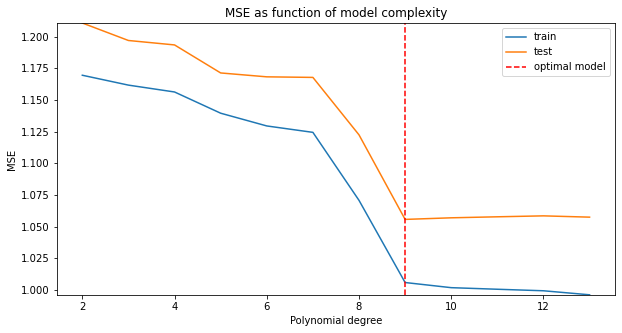

In [395]:
plot_train_test_MSE(df_error.index, df_error['MSE train'], df_error['MSE test'])

![alt](figs/mse_train_test_100x100n2.png)

Compared to Figure 2.11 in Hastie, the MSE for fitting the FrankeFunction varies less smoothly with model complexity. The training MSE decreases slightly, but steadily with increasing model complexity, whereas the test MSE varies a bit more irregularly. This is most likely caused by the significant random noise applied to FrankeFunction, in addition to less data samples to test on (compared to training). Still, it is clear that the test MSE follows a general trend of initial declination before more or less flattening out (a hardly visible increment). The minimum reached at this inflection point reflects the model complexity at which there is a good balance between bias and variance.

The loss function $C(\textbf{X}, \beta)$ represents the net error from our prediction, and is interpreted as the expected squared deviation of the predicted output $\tilde{y}$ from the true target $y$. More specifically, the loss can be separated into two parts; a bias and a variance. 

The first term,
\begin{equation}
    \frac{1}{n}\sum_i (f_i - E[\tilde{y}])^2,
\end{equation}
is the bias. It represents the systematical error of our fitted model, more specifically - the deviation of the expected output prediction $E[\tilde{y}]$ from the true model $f_i$ (replaced by target $y_i$, since we don't really know the true underlying model). So, if $E[\tilde{y}]$ is adequately far from $f_i$ it implies that the individual predictions $\tilde{y_i}$ are systematically missing its target, expressed as a bias. The bias is illustrated in the figure below.

![alt](figs/bias_fig2.jpg)

The second term,
\begin{equation}
    \frac{1}{n}\sum_i (\tilde{y_i} - E[\tilde{y}])^2,
\end{equation}
is the variance. This represents the $\textit{internal}$ deviation of our predicted model. That is, the net deviation of each predicted output $\tilde{y_i}$ from the expected output prediction $E[\tilde{y}]$. It reflects the distance of each point $\tilde{y_i}$ to the expectation $E[\tilde{y}]$. So, if the quantity is large it means the individual predictions $\tilde{y_i}$ are widely spread out from their mean $E[\tilde{y}]$. The variance is illustrated in the figure below.

![alt](figs/variance_fig2.jpg)

The last term, $\sigma^2$, is simply the irreducible error from the true model itself - it is fixed. Hence, it represents the part of the MSE that can't be tuned or improved by a machine learning algorithm. Consequently, the MSE will be lower bounded by $\sigma^2$, meaning that we are unable to reproduce the desired model $f_i$ perfectly.

|   | MSE train	| MSE test | R2 train | R2 test  |
|---|-----------|----------|----------|----------|
| 2 | 1.26245	| 1.22153  | 0.07287  | -0.17589 |
| 3	| 1.25745	| 1.17456  | 0.07655  | -0.13068 |
| 4	| 1.22921	| 1.18724  | 0.09729  | -0.14288 | 
| 5	| 1.22838	| 1.19255  | 0.09790  | -0.14799 | 
| 6	| 1.20406	| 1.16514  | 0.11576  | -0.12161 |
| 7	| 1.17994	| 1.35011  | 0.13347  | -0.29966 |
| 8	| 1.15629	| 1.31745  | 0.15083  | -0.26823 |
| 9	| 1.13177	| 1.53637  | 0.16884  | -0.47896 |
| 10| 1.11880	| 1.62794  | 0.17837  | -0.56711 |
| 11| 1.11363	| 1.59544  | 0.18217  | -0.53583 |

The table above gives the errors from the simulation (same as those used to plot the bias-variance relation) for training and test set for different model complexities. The MSE in the training set shows a slight but steady decline for increasing model complexity. Note that the MSE is steadily reducing towards one - the variance of the irreducible random noise.

The MSE for the test set initially fluctuates a bit up and down, but with a general declining trend. Suddenly, the MSE raises dramatically, indicating overfitting. That is, the trained model is too complex in the sense that it is able to interpolate through most of the fluctuations in the training points of FrankeFunction. A consequence of this overfit is that the model will fail miserably when predicting the test data. The overfitted model is not able to generalize to new unseen data. 

However, for too low model complexity the test MSE is still not that good. This is an example of underfitting - the trained model is too simple compared to the true model. Hence, our predictions become too general, not able to capture important deviations in the data set. The table shows that this is an issue for both the training and test set; too large MSEs. 

The minimum of test MSE at the inflection point indicates what model complexity that provide the optimal trade-off between bias and variance, and should serve as a basis for model selection.

In [530]:
def plot_bias_variance(mse_train, mse_test, bias, variance, from_deg, to_deg):
    plt.figure(figsize=[10, 5])
    degrees = range(from_deg, to_deg)
    plt.plot(degrees, mse_train, c='orange', label='mse train')
    plt.plot(degrees, mse_test, c='b', label='mse test')
    plt.plot(degrees, bias, c='g', label='bias test')
    plt.plot(degrees, variance, c='r', label='variance test')
    plt.xlabel('Polynomial degree')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

In [542]:
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def bootstrap(xy_train, xy_test, z_train, z_test, B, deg, scaler=False):
    """Perform bootstrapping on input data (x,y), then train an OLS model
    with the resampled set and use it to predict targets z.
    
    Args:
        x, y (1D array): input variables
        z (2D array): target function
        B (int): number of bootstraps
        deg (int): polynomial degree
        
    """        
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression(fit_intercept=False))
    z_tilde = np.zeros((z_train.shape[0], B))
    z_pred = np.zeros((z_test.shape[0], B))
    
    if scaler:
        xy_train, xy_test = scaling_train_test(scaler, xy_train, xy_test)
    
    for i in range(B): # Amounts of bootstraps to perform
        xy_boot, z_boot = resample(xy_train, z_train)
    
        model.fit(xy_boot, z_boot)
        z_tilde[:,i] = model.predict(xy_train)
        z_pred[:,i] = model.predict(xy_test)
        
    mse_test, bias_test, var_test = mse_decomposition(z_test.reshape(-1,1), z_pred)
    mse_train, bias_train, var_train = mse_decomposition(z_train.reshape(-1,1), z_tilde)
    
    return mse_train, mse_test, bias_test, var_test

In [543]:
x = np.arange(0, 1, 0.02)
y = np.arange(0, 1, 0.02)
x, y = np.meshgrid(x, y)

x_1d = np.ravel(x).reshape(np.size(x), 1) # Turn gridded x into 1d vector
y_1d = np.ravel(y).reshape(np.size(y), 1)
x_y = np.hstack((x_1d, y_1d))

z_new = FrankeFunction(x, y, add_noise=True)
z_1d = np.ravel(z_new)

from_deg = 1; to_deg = 17
errors_train = np.zeros(to_deg-from_deg)
errors_test = np.zeros_like(errors_train)
biases = np.zeros_like(errors_train)
variances = np.zeros_like(errors_train)

xy_train, xy_test, z_train, z_test = train_test_split(x_y, z_1d, test_size=0.25, random_state=2123)

for d in range(from_deg, to_deg):
    error_train, error_test, bias_test, var_test = bootstrap(xy_train, xy_test, z_train, z_test, 100 , d, scaler=StandardScaler)
    
    errors_train[d-from_deg] = error_train # subtract from_deg to start at index 0
    errors_test[d-from_deg] = error_test 
    biases[d-from_deg] = bias_test
    variances[d-from_deg] = var_test

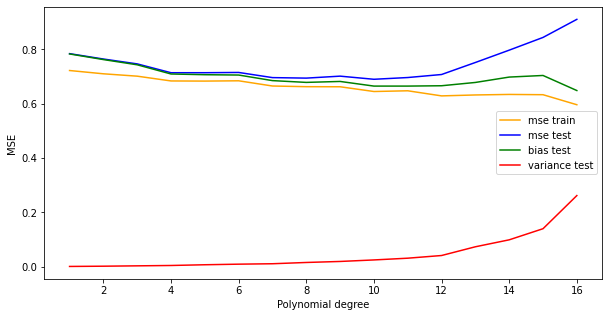

In [544]:
plot_bias_variance(errors_train, errors_test, biases, variances, from_deg, to_deg)

![alt](figs/boot_bias_var_50n_100B.png)

The plot above shows the decomposition of the MSE into bias and variance for the test data as well as the MSE for training data, using 50 samples and 100 bootstraps. The simulation shows that a large polynomial degree is needed required to reduce the bias, as well as increasing the variance. The FrankeFunction with standard deviation 1 is so noisy that even a high ordered polynomial model will possess significant bias, although slightly reduced. Variance, on the other hand, suddenly increases rapidly for a certain high polynomial degree - as a result of the fitted model generating numerous spikes between the target points for the test data. This is the complexity level where the model starts overfitting, and indicates that we are moving from a bias-dominated region to a variance-dominated region. On the contrary, the training MSE is slightly but consistently decreasing, as our trained model gets better and better for high order polynomials. Hence, a good trade-off between bias and variance is achieved around this region (polynomial order nine to eleven for this simulation), and is indicative of optimal model selection.

### TO-DO:
#### Derive expression for MSE

### Exercise 3:  Cross-validation as resampling techniques, adding more complexity (score 15 points)

The aim here is to write your own code for another widely popular
resampling technique, the so-called cross-validation method.  Again,
before you start with cross-validation approach, you should scale your
data.

Implement the $k$-fold cross-validation algorithm (write your own
code) and evaluate again the MSE function resulting
from the test folds. You can compare your own code with that from
**Scikit-Learn** if needed. 

Compare the MSE you get from your cross-validation code with the one
you got from your **bootstrap** code. Comment your results. Try $5-10$
folds.  You can also compare your own cross-validation code with the
one provided by **Scikit-Learn**.

In [586]:
from sklearn.model_selection import cross_val_score, KFold

x = np.arange(0, 1, 0.01)
y = np.arange(0, 1, 0.01)
x, y = np.meshgrid(x, y)

x_1d = np.ravel(x).reshape(np.size(x), 1) # Turn gridded x into 1d vector
y_1d = np.ravel(y).reshape(np.size(y), 1)
x_y = np.hstack((x_1d, y_1d))

z_new = FrankeFunction(x, y, add_noise=True)
z_1d = np.ravel(z_new)

def linreg_CV(x_y, z, k=5, degree=5):
    kfold = KFold(n_splits = k)
    mse_kfold = np.zeros(k)

    linreg = LinearRegression(fit_intercept=False)
    i = 0
    for train_idx, test_idx in kfold.split(x_y): # Split input data into bins of train and test
        x_train = x_y[train_idx] # Assign training data based on split
        z_train = z[train_idx]
        x_test = x_y[test_idx]
        z_test = z[test_idx]

        X_train = create_X(x_train[:,0], x_train[:,1], degree)
        X_test = create_X(x_test[:,0], x_test[:,1], degree)

        linreg.fit(X_train, z_train[:, np.newaxis])
        z_pred = linreg.predict(X_test)

        mse_kfold[i] = np.sum((z_pred - z_test[:, np.newaxis])**2)/np.size(z_pred) # Retain MSE before starting on new fold
        i += 1

    estimated_mse_kfold = np.mean(mse_kfold)
    return estimated_mse_kfold

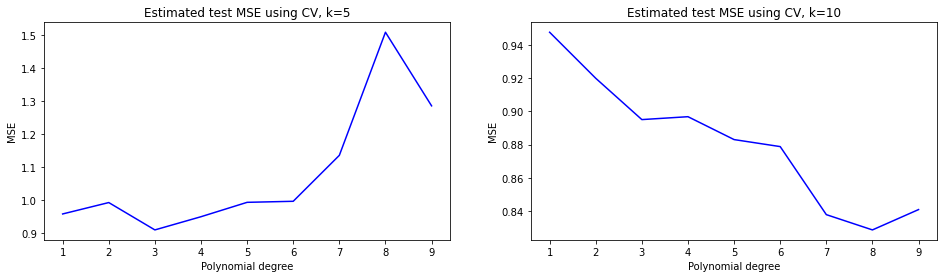

In [587]:
maxdeg = 10
polydegs = np.arange(1, maxdeg)
all_mse_kfold = np.zeros(maxdeg-1)

fig, ax = plt.subplots(1,2, figsize=[16,4])
kfolds = [5, 10]

for i, k in enumerate(kfolds):
    for deg in range(1, maxdeg):
        estimated_mse_kfold = linreg_CV(x_y, z_1d, k=k, degree=deg)
        all_mse_kfold[deg-1] = estimated_mse_kfold

    ax[i].plot(polydegs[:k+5], all_mse_kfold[:k+5], c='b')
    ax[i].set(xlabel='Polynomial degree', ylabel='MSE', title=f'Estimated test MSE using CV, k={k}')
plt.show()

The two plots above show the expected MSE for test data using k-fold cross-validation for $k=5$ and $k=10$ folds, respectively. Interestingly, the optimal model complexity (that is, accompanied by lowest MSE) is remarkably different for the two folds. Using $k=5$, the lowest obtained MSE is for a model with polynomial degree in the range 3-5, whereas for $k=10$ it is in the range 8-11. 

Reminding ourselves of the effect of the number of folds $k$ in the train-test-splitting, the results make sense. When $k$ is low, e.g. 5, the training sets for the different splits are more likely to be different, in contrast to a large $k$ where much of the same data is aquired in the reshuffling for training sets. Therefore, for low $k$ the model must adapt to quite different sets of data points, implying it is not that sensitive to outliers, resulting in low variance. On the contrary, bias could be high. The reason is that for low $k$ less data is used for training, and the model provides a weaker fit. 

If $k$ is larger, e.g. 10, substantially more data is used for training, which makes the model a better fit to the targets. Hence, bias is low, but this comes at the expense of the variance. The variance is high for much of the same reason; the trained model has adapted to "too many" datapoints, creating large fluctuations for the perfect fit.

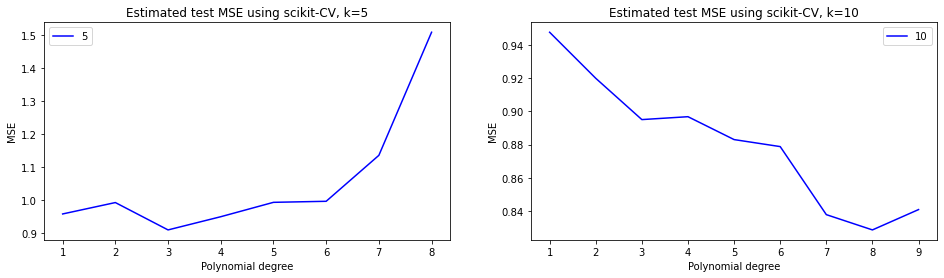

In [593]:
scikit_mse_kfold = np.zeros(maxdeg-1)

fig, ax = plt.subplots(1,2, figsize=[16,4])
kfolds = [5, 10]

for i, k in enumerate(kfolds):
    kfold = KFold(n_splits = k)
    for deg in range(1, maxdeg):
        OLS = LinearRegression(fit_intercept=False)
        X = create_X(x_y[:,0], x_y[:,1], deg)
        
        estimated_mse = cross_val_score(OLS, X, z_1d, scoring='neg_mean_squared_error', cv=kfold)
        scikit_mse_kfold[deg-1] = np.mean(-estimated_mse)

    ax[i].plot(polydegs[:k+3], scikit_mse_kfold[:k+3], c='b', label=f'k={k}')
    ax[i].set(xlabel='Polynomial degree', ylabel='MSE', title=f'Estimated test MSE using scikit-CV, k={k}')
    ax[i].legend()
plt.show()

The plots above show the same experiment but using scikit's functionality for cross-validation. By comparing them to the plots from my own implementation of cross-validation, it is clear that they show similar behavior for the various model complexities. Hence, it is a verification that my own implementation of CV is correct.

### Exercise 4: Ridge Regression on the Franke function  with resampling (score 20 points)

Write your own code for the Ridge method, either using matrix
inversion or the singular value decomposition as done in the previous
exercise. Perform the same bootstrap analysis as in the
Exercise 2  (for the same polynomials) and the cross-validation  in exercise 3 but now for different values of $\lambda$. Compare and
analyze your results with those obtained in exercises 1-3. Study the
dependence on $\lambda$.

Study also the bias-variance trade-off as function of various values of
the parameter $\lambda$. For the bias-variance trade-off, use the **bootstrap** resampling method. Comment your results. 

### Exercise 5: Lasso Regression on the Franke function  with resampling (Score 10 points))

This exercise is essentially a repeat of the previous two ones, but now
with Lasso regression. Write either your own code (difficult and optional) or, in this case,
you can also use the functionalities of **Scikit-Learn** (recommended). 
Give a
critical discussion of the three methods and a judgement of which
model fits the data best.  Perform here as well an analysis of the bias-variance trade-off using the **bootstrap** resampling technique and an analysis of the mean squared error using cross-validation. 

### Exercise 6: Analysis of real data  (score 30 points)

With our codes functioning and having been tested properly on a
simpler function we are now ready to look at real data. We will
essentially repeat in this exercise what was done in exercises 1-5. However, we
need first to download the data and prepare properly the inputs to our
codes.  We are going to download digital terrain data from the website
<https://earthexplorer.usgs.gov/>,

Or, if you prefer, we have placed selected datafiles at <https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects/2021/Project1/DataFiles>

In order to obtain data for a specific region, you need to register as
a user (free) at this website and then decide upon which area you want
to fetch the digital terrain data from.  In order to be able to read
the data properly, you need to specify that the format should be **SRTM
Arc-Second Global** and download the data as a **GeoTIF** file.  The
files are then stored in *tif* format which can be imported into a
Python program using

In [ ]:
scipy.misc.imread

Here is a simple part of a Python code which reads and plots the data
from such files

In [ ]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the terrain
terrain1 = imread('SRTM_data_Norway_1.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

If you should have problems in downloading the digital terrain data,
we provide two examples under the data folder of project 1. One is
from a region close to Stavanger in Norway and the other Møsvatn
Austfjell, again in Norway.
Feel free to produce your own terrain data.


Alternatively, if you would like to use another data set, feel free to do so. This could be data close to your reseach area or simply a data set you found interesting. See for example [kaggle.com](https://www.kaggle.com/datasets) for examples.


Our final part deals with the parameterization of your digital terrain
data (or your own data).  We will apply all three methods for linear regression, the same type (or higher order) of polynomial
approximation and cross-validation as resampling technique to evaluate which
model fits the data best.

At the end, you should present a critical evaluation of your results
and discuss the applicability of these regression methods to the type
of data presented here (either the terrain data we propose or other data sets).




## Background literature

1. For a discussion and derivation of the variances and mean squared errors using linear regression, see the [Lecture notes on ridge regression by Wessel N. van Wieringen](https://arxiv.org/abs/1509.09169)

2. The textbook of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570), chapters 3 and 7 are the most relevant ones for the analysis here. 

## Introduction to numerical projects

Here follows a brief recipe and recommendation on how to answer the various questions when preparing your answers. Note that you can answer question by question and there is no need to structure your report as a scientific report with abstract, introduction, theory, results and discussions, conclusions etc. But you have the following elements in mind when you answer the various questions.


  * Give a short description of the nature of the problem and the eventual  numerical methods you have used.

  * Describe the algorithm you have used and/or developed. Here you may find it convenient to use pseudocoding. In many cases you can describe the algorithm in the program itself.

  * Include the source code of your program. Comment your program properly. You should have the code at your GitHub/GitLab link. You can also place the code in an appendix of your report.

  * If possible, try to find analytic solutions, or known limits in order to test your program when developing the code.

  * Include your results either in figure form or in a table. Remember to        label your results. All tables and figures should have relevant captions        and labels on the axes.

  * Try to evaluate the reliabilty and numerical stability/precision of your results. If possible, include a qualitative and/or quantitative discussion of the numerical stability, eventual loss of precision etc.

  * Try to give an interpretation of you results in your answers to  the problems.

  * Critique: if possible include your comments and reflections about the  exercise, whether you felt you learnt something, ideas for improvements and  other thoughts you've made when solving the exercise. We wish to keep this course at the interactive level and your comments can help us improve it.

  * Try to establish a practice where you log your work at the  computerlab. You may find such a logbook very handy at later stages in your work, especially when you don't properly remember  what a previous test version  of your program did. Here you could also record  the time spent on solving the exercise, various algorithms you may have tested or other topics which you feel worthy of mentioning.

## Format for electronic delivery of report and programs

The preferred format for the report is a PDF file. You can also use DOC or postscript formats or as an ipython notebook file.  As programming language we prefer that you choose between C/C++, Fortran2008, Julia or Python. The following prescription should be followed when preparing the report:

  * Use Canvas to hand in your projects, log in  at  <https://www.uio.no/english/services/it/education/canvas/> with your normal UiO username and password.

  * Upload **only** the report file or the link to your GitHub/GitLab or similar typo of  repos!  For the source code file(s) you have developed please provide us with your link to your GitHub/GitLab or similar  domain.  The report file should include all of your discussions and a list of the codes you have developed.  Do not include library files which are available at the course homepage, unless you have made specific changes to them.

  * In your GitHub/GitLab or similar repository, please include a folder which contains selected results. These can be in the form of output from your code for a selected set of runs and input parameters.

Finally, 
we encourage you to collaborate. Optimal working groups consist of 
2-3 students. You can then hand in a common report. 



## Software and needed installations

If you have Python installed (we recommend Python3) and you feel pretty familiar with installing different packages, 
we recommend that you install the following Python packages via **pip** as
1. pip install numpy scipy matplotlib ipython scikit-learn tensorflow sympy pandas pillow

For Python3, replace **pip** with **pip3**.

See below for a discussion of **tensorflow** and **scikit-learn**. 

For OSX users we recommend also, after having installed Xcode, to install **brew**. Brew allows 
for a seamless installation of additional software via for example
1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution
you can use **pip** as well and simply install Python as 
1. sudo apt-get install python3  (or python for python2.7)

etc etc. 

If you don't want to install various Python packages with their dependencies separately, we recommend two widely used distrubutions which set up  all relevant dependencies for Python, namely
1. [Anaconda](https://docs.anaconda.com/) Anaconda is an open source distribution of the Python and R programming languages for large-scale data processing, predictive analytics, and scientific computing, that aims to simplify package management and deployment. Package versions are managed by the package management system **conda**

2. [Enthought canopy](https://www.enthought.com/product/canopy/)  is a Python distribution for scientific and analytic computing distribution and analysis environment, available for free and under a commercial license.

Popular software packages written in Python for ML are

* [Scikit-learn](http://scikit-learn.org/stable/), 

* [Tensorflow](https://www.tensorflow.org/),

* [PyTorch](http://pytorch.org/) and 

* [Keras](https://keras.io/).

These are all freely available at their respective GitHub sites. They 
encompass communities of developers in the thousands or more. And the number
of code developers and contributors keeps increasing.